Motivation

Testing the new templates for redshift fitting. For that we need to define a sample of main-survey tiles (both bright and dark, observed in a range of conditions).

In [24]:
import fitsio
import numpy as np
import matplotlib.pyplot as plt
import itertools
import pandas as pd
from astropy.table import Table

In [2]:
# My universe set will be the tiles included in iron

In [3]:
iron_tiles = fitsio.read('/global/cfs/cdirs/desi/spectro/redux/iron/tiles-iron.fits')

In [4]:
is_main = iron_tiles['SURVEY']=='main'
is_dark = iron_tiles['PROGRAM']=='dark'
is_bright = iron_tiles['PROGRAM']=='bright'

In [5]:
iron_tiles

array([(80615, 'cmx', 'other', 'm33', 'cmxm33',  4,  3600.1,  24.027, 31.39 ,  0. , 3298.4, 0., 1000., 'obsend', 3204.8, 3298.4, 3196.1,  3552.9, 'other', 0.9 , 20201216),
       (80609, 'sv1', 'dark', 'lrgqso', 'cmxlrgqso', 15, 13500.7, 150.12 ,  2.206,  0. , 7779.9, 0., 4000., 'obsend', 7670.3, 7779.9, 7978.7, 10690.3, 'dark', 0.9 , 20201217),
       (80606, 'sv1', 'dark', 'elg', 'cmxelg', 12, 10800.7,  36.448, -4.501,  0. , 6650.8, 0., 4000., 'obsend', 6405.5, 6650.8, 6510.6,  7235.5, 'dark', 0.9 , 20201219),
       ...,
       (40275, 'main', 'backup', 'backup', 'mainbackup',  1,   601.1, 219.357,  9.389, 48.9,   74.4, 0.,   60., 'obsend',   66.5,   78. ,   69.6,    43.1, 'backup', 0.85, 20220613),
       (42339, 'main', 'backup', 'backup', 'mainbackup',  2,   820.8, 290.287, 32.816, 57.4,   71.4, 0.,   60., 'obsend',   69.4,   86.3,   70.1,    20.8, 'backup', 0.85, 20220613),
       (40336, 'main', 'backup', 'backup', 'mainbackup',  1,   603. , 276.744, 23.285, 43.1,   65.4, 0.,  

In [6]:
print('Dark tiles in main survey', np.count_nonzero(is_main & is_dark))
print('Bright tiles in main survey', np.count_nonzero(is_main & is_bright))

Dark tiles in main survey 2744
Bright tiles in main survey 2275


In [6]:
conditions = ['EXPTIME', 'EFFTIME_SPEC', 'TILEDEC']

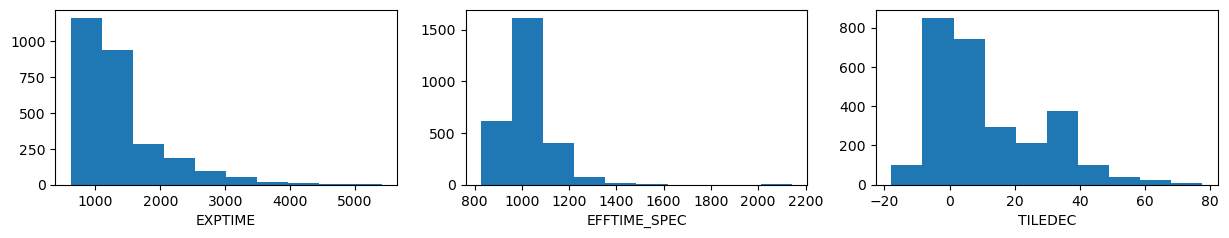

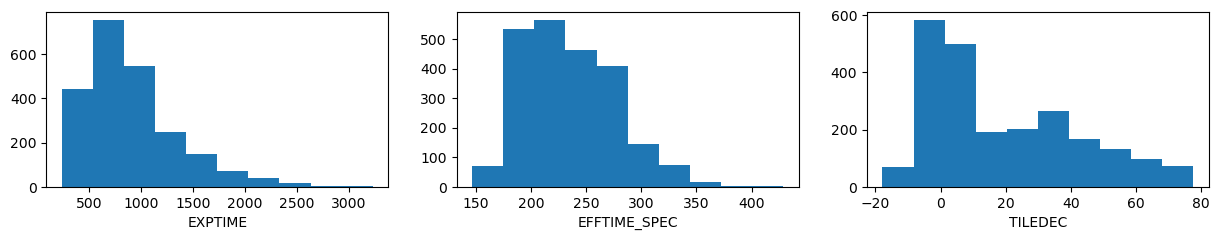

In [7]:
plt.figure(figsize=(15,5))
for i, c in enumerate(conditions):
    plt.subplot(2,len(conditions), i+1)
    plt.hist(iron_tiles[c][is_dark & is_main])
    plt.xlabel(c)
    
plt.figure(figsize=(15,5))
for i, c in enumerate(conditions):
    plt.subplot(2,len(conditions), (i+1)+len(conditions))
    plt.hist(iron_tiles[c][is_bright & is_main])
    plt.xlabel(c)

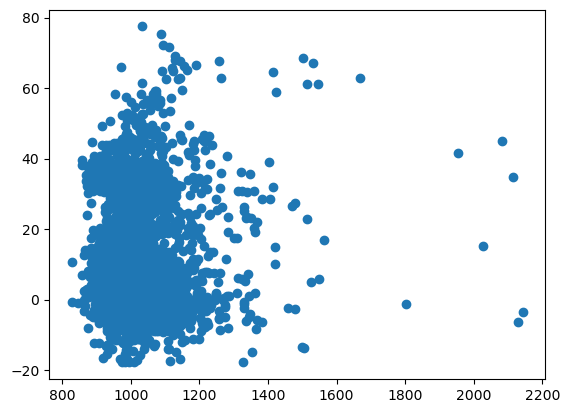

In [8]:
plt.scatter(iron_tiles['EFFTIME_SPEC'][is_main&is_dark], iron_tiles['TILEDEC'][is_main&is_dark])

In [81]:
def sample_tiles(input_tiles, conditions, random_seed=55):
    np.random.seed(random_seed)
    # now we select the boundaries for three different regions: below median, around median, above median
    subset_percent = {}
    for c in conditions:
        subset_percent[c] = np.percentile(input_tiles[c],[0,33,66,100]) 
        print(subset_percent[c])
    
    
    # now define all the possible permutations of the three different regions over the four different conditions
    n_c = len(conditions)

    # Define the elements
    elements = [0, 1, 2]

    # Generate all permutations of length n_c
    permutations = list(itertools.product(elements, repeat=n_c))
    print(len(permutations))
    tileids = []
    ntiles = []
    # Print the permutations
    for perm in permutations:
        a = list(perm)
        is_in_permutation = np.array([True] * len(input_tiles))
        for i, c in enumerate(conditions):
            is_in_condition = (input_tiles[c]>=subset_percent[c][a[i]]) & (input_tiles[c]<=subset_percent[c][a[i]+1])
            is_in_permutation &= is_in_condition
        #print(perm, np.count_nonzero(is_in_permutation))
        tmp_tiles = input_tiles[is_in_permutation]
        random_indices = np.random.choice(tmp_tiles.shape[0], size=1, replace=False)
        random_tile = tmp_tiles[random_indices]
        print(random_tile)
        tileids.append(random_tile['TILEID'][0])
        ntiles.append(np.count_nonzero(is_in_permutation))
    return tileids, ntiles

In [82]:
dark_tiles = iron_tiles[['TILEID']+conditions][is_main & is_dark]
darkids, ndark = sample_tiles(dark_tiles, conditions)

[ 622.3   1027.447 1377.214 5407.2  ]
[ 827.5    977.419 1037.5   2142.3  ]
[-17.841     0.8215   14.24248  77.502  ]
27
[(3239, 792.9, 911.2, -6.199)]
[(2369, 868.2, 967.2, 8.322)]
[(3772, 898.6, 968.1, 30.486)]
[(10366, 930., 989.5, -6.532)]
[(9807, 932.2, 991.7, 13.763)]
[(6049, 906.5, 1011.4, 35.206)]
[(6284, 1026.3, 1057.6, -4.084)]
[(11204, 1003.6, 1064.2, 1.893)]
[(2203, 778.7, 1038.8, 30.463)]
[(1460, 1304.8, 956.9, 0.713)]
[(5240, 1131.3, 934.7, 3.997)]
[(3981, 1050., 969.6, 29.586)]
[(5243, 1327.3, 1016., 0.476)]
[(8635, 1162.3, 977.5, 6.356)]
[(2417, 1043.7, 981.5, 14.854)]
[(1834, 1168.7, 1084.1, -2.436)]
[(7970, 1155.1, 1110.3, 13.435)]
[(9529, 1206.8, 1053.2, 17.482)]
[(10377, 1415.1, 943.8, -3.294)]
[(3393, 1591., 965.9, 1.226)]
[(7083, 1427.7, 974.6, 25.482)]
[(10357, 2501.1, 1023.6, -5.823)]
[(10604, 1587.7, 1031.8, 6.118)]
[(5288, 2023.8, 997.4, 37.68)]
[(5676, 2404.2, 1082.9, -7.554)]
[(6943, 2117.1, 1123., 8.182)]
[(7893, 1923.4, 1217.6, 42.5)]


In [83]:
bright_tiles = iron_tiles[['TILEID']+conditions][is_main & is_bright]
brightids, nbright = sample_tiles(bright_tiles, conditions)

[ 239.6    665.784  981.4   3227.1  ]
[146.9   209.3   252.484 428.4  ]
[-17.841     2.687    28.30692  77.653  ]
27
[(23229, 544.4, 176.8, -0.018)]
[(20079, 539.5, 201.9, 20.054)]
[(25893, 640.6, 181.5, 37.781)]
[(23997, 629.5, 240.9, -9.02)]
[(21375, 546.5, 222.8, 28.035)]
[(25692, 520.9, 241.9, 53.768)]
[(25823, 643.6, 261.1, 2.589)]
[(25553, 433.7, 276.3, 4.91)]
[(25089, 620.1, 262.9, 49.414)]
[(23223, 850.3, 157.6, -2.662)]
[(21649, 874.2, 184.2, 13.144)]
[(20901, 742.5, 205.8, 49.469)]
[(20582, 713.3, 248.8, -4.815)]
[(22665, 822.6, 225.9, 8.855)]
[(22174, 808.1, 222.8, 58.776)]
[(24684, 766.1, 288.8, -7.466)]
[(25811, 872.6, 271.5, 9.496)]
[(24436, 794.5, 256.1, 67.361)]
[(20548, 1023.3, 188.8, -0.459)]
[(24770, 986.9, 173.8, 13.772)]
[(22170, 1310.5, 204.3, 57.392)]
[(23716, 1056.9, 235.9, -4.248)]
[(23251, 1620.7, 234.6, 3.951)]
[(26015, 1413.7, 251.2, 68.431)]
[(26147, 2162.4, 330.9, -17.304)]
[(20393, 1124.1, 305.6, 16.844)]
[(21190, 2084.7, 326.1, 46.977)]


In [84]:
output = {}
output['TILEID'] = darkids+brightids
output['NTILE_SIMILAR'] = ndark+nbright
df = pd.DataFrame.from_dict(output)
# Save the DataFrame to a CSV file
df.to_csv('sample_tiles_iron.csv', index=False)

In [85]:
sample_tiles = Table.read('sample_tiles_iron.csv')

In [86]:
sample_tiles

TILEID,NTILE_SIMILAR
int64,int64
3239,105
2369,188
3772,222
10366,54
9807,74
6049,168
6284,9
11204,15
2203,71


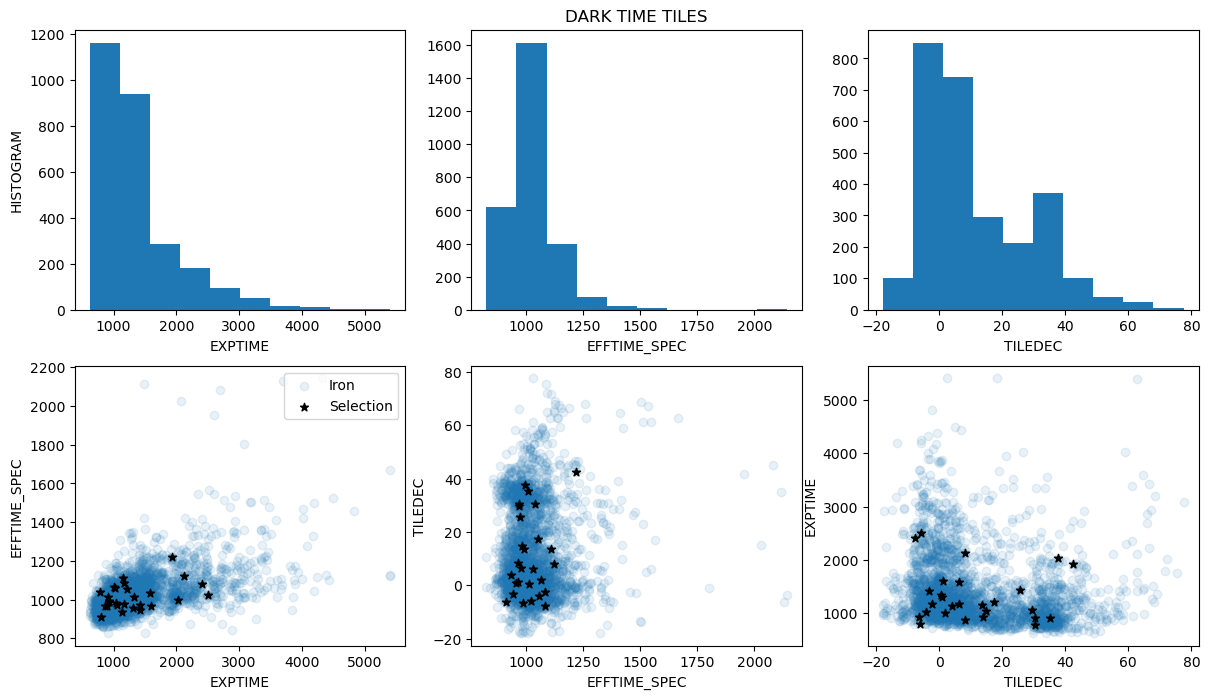

In [90]:
plt.figure(figsize=(14.5,8))


for i, c in enumerate(conditions):
    plt.subplot(2, len(conditions), i+1)
    plt.hist(iron_tiles[c][is_dark & is_main])
    plt.xlabel(c)
    if(i==0):
        plt.ylabel('HISTOGRAM')
    if(i==1):
        plt.title('DARK TIME TILES')


in_tiles = np.isin(iron_tiles['TILEID'], sample_tiles['TILEID'])
plt.subplot(2,3, 4)
plt.scatter(iron_tiles['EXPTIME'][is_dark & is_main], iron_tiles['EFFTIME_SPEC'][is_dark & is_main], alpha=0.1, label='Iron')
plt.scatter(iron_tiles['EXPTIME'][is_dark & is_main & in_tiles], iron_tiles['EFFTIME_SPEC'][is_dark & is_main & in_tiles], marker='*', c='black', label='Selection')
plt.xlabel('EXPTIME')
plt.ylabel('EFFTIME_SPEC')
plt.legend()


plt.subplot(2,3, 5)
plt.scatter(iron_tiles['EFFTIME_SPEC'][is_dark & is_main], iron_tiles['TILEDEC'][is_dark & is_main], alpha=0.1)
plt.scatter(iron_tiles['EFFTIME_SPEC'][is_dark & is_main & in_tiles], iron_tiles['TILEDEC'][is_dark & is_main & in_tiles], marker='*', c='black')
plt.xlabel('EFFTIME_SPEC')
plt.ylabel('TILEDEC')


plt.subplot(2,3,6)
plt.scatter(iron_tiles['TILEDEC'][is_dark & is_main], iron_tiles['EXPTIME'][is_dark & is_main], alpha=0.1)
plt.scatter(iron_tiles['TILEDEC'][is_dark & is_main & in_tiles], iron_tiles['EXPTIME'][is_dark & is_main & in_tiles], marker='*', c='black')
plt.xlabel('TILEDEC')
plt.ylabel('EXPTIME')
plt.savefig('dark_tiles_iron_selection.jpg', bbox_inches='tight')

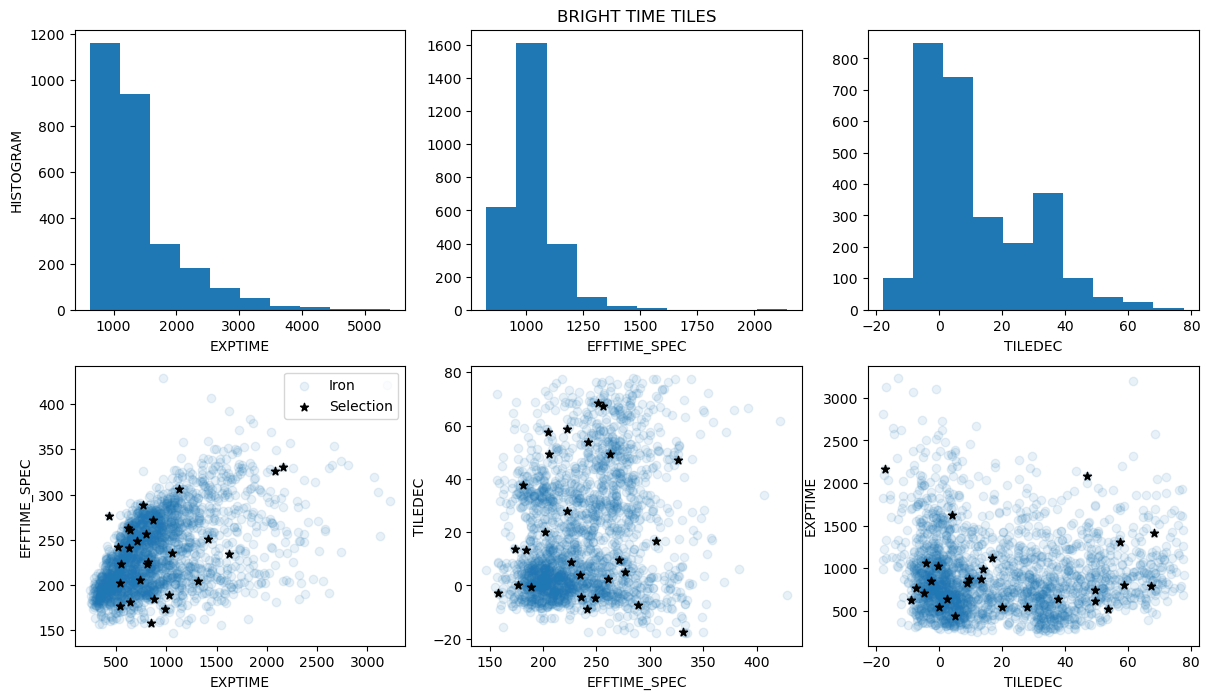

In [89]:
plt.figure(figsize=(14.5,8))


for i, c in enumerate(conditions):
    plt.subplot(2, len(conditions), i+1)
    plt.hist(iron_tiles[c][is_dark & is_main])
    plt.xlabel(c)
    if(i==0):
        plt.ylabel('HISTOGRAM')
    if(i==1):
        plt.title('BRIGHT TIME TILES')


in_tiles = np.isin(iron_tiles['TILEID'], sample_tiles['TILEID'])
plt.subplot(2,3, 4)
plt.scatter(iron_tiles['EXPTIME'][is_bright & is_main], iron_tiles['EFFTIME_SPEC'][is_bright & is_main], alpha=0.1, label='Iron')
plt.scatter(iron_tiles['EXPTIME'][is_bright & is_main & in_tiles], iron_tiles['EFFTIME_SPEC'][is_bright & is_main & in_tiles], marker='*', c='black', label='Selection')
plt.xlabel('EXPTIME')
plt.ylabel('EFFTIME_SPEC')
plt.legend()


plt.subplot(2,3, 5)
plt.scatter(iron_tiles['EFFTIME_SPEC'][is_bright & is_main], iron_tiles['TILEDEC'][is_bright & is_main], alpha=0.1)
plt.scatter(iron_tiles['EFFTIME_SPEC'][is_bright & is_main & in_tiles], iron_tiles['TILEDEC'][is_bright & is_main & in_tiles], marker='*', c='black')
plt.xlabel('EFFTIME_SPEC')
plt.ylabel('TILEDEC')


plt.subplot(2,3,6)
plt.scatter(iron_tiles['TILEDEC'][is_bright & is_main], iron_tiles['EXPTIME'][is_bright & is_main], alpha=0.1)
plt.scatter(iron_tiles['TILEDEC'][is_bright & is_main & in_tiles], iron_tiles['EXPTIME'][is_bright & is_main & in_tiles], marker='*', c='black')
plt.xlabel('TILEDEC')
plt.ylabel('EXPTIME')

plt.savefig('bright_tiles_iron_selection.jpg', bbox_inches='tight')

In [69]:
iron_exposures = fitsio.read('/global/cfs/cdirs/desi/spectro/redux/iron/exposures-iron.fits')

In [55]:
is_main = iron_tiles['SURVEY']=='main'
is_dark = iron_tiles['PROGRAM']=='dark'
is_bright = iron_tiles['PROGRAM']=='bright'

In [ ]:
print('Dark exposures in main survey', np.count_nonzero(is_main & is_dark))
print('Bright exposures in main survey', np.count_nonzero(is_main & is_bright))